<a href="https://colab.research.google.com/github/Ragu111199/DataScienceProjects-Python/blob/main/Exploring_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring data using Pandas

To download the data from the fivethirtyeight.com

In [ ]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")


 **To import the data and check that type**

In [ ]:
import pandas as pd 
nba = pd.read_csv("nba_all_elo.csv")
type(nba)

**To know datatype of each column of the dataset - dataframe.info()**

In [ ]:
nba.info()

**To know statistics metrics**

In [ ]:
nba.describe()

**To display first five rows**

In [ ]:
nba.head()

**To display last five rows**

In [7]:
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.6349,1822.2881,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


**To know number of rows and columns**

In [ ]:
len(nba) # to count number of rows
nba.shape# to return a tuple that contains number of rows and columns in the data set

**Pandas datatypes**
### 1. Series
### 2. Dataframe


**To know about Pandas Series**
### it contains two components
#### 1. A sequence of values
#### 2. A sequence of identifiers(indices)

**Example for creating pandas series object and know how to access them**

In [14]:
 S = pd.Series([20,30,40]) # to create the pandas series
 print(S.values) # to display all  values
 print(S.index) # to display default indices for the series S
 print(type(S))# to disply the type of the array of series

[20 30 40]
RangeIndex(start=0, stop=3, step=1)
<class 'pandas.core.series.Series'>


**Pandas series with user defined index**


In [22]:
S2 = pd.Series([1,2,3],index=["ramu","somu","mamu"]) # to create pandas series using user defined index
print(S2.index) # to display index
print(S2.keys()) # to display index

Index(['ramu', 'somu', 'mamu'], dtype='object')
Index(['ramu', 'somu', 'mamu'], dtype='object')


**Pandas series using Dictionary**

In [27]:
S3 = pd.Series({"ramu":1,"somu":2,"mamu":3})
print(S3.values) # To display value in type of array
print(S3.keys())# to display all the keys of dictionary

[1 2 3]
Index(['ramu', 'somu', 'mamu'], dtype='object')


**pandas Series Accessing elements**
## 1.Using index operator []
#####  1.**A positional or implicit index**, which is always a RangeIndex
2.**A label or explicit index**, which can contain any hashable objects 



In [ ]:
print(S3[1]) # give output as python array
print(S3["ramu"])# give output as python dictionary

**2.Using Accessing methods**
####1.  **.loc** refers to the label index.
####2. **.iloc** refers to the positional index.
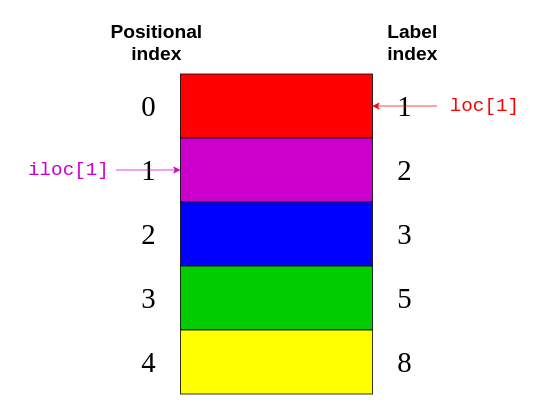



In [34]:
S3.loc["ramu"] # this method uses label index

1

In [35]:
S3.iloc[-1] # this method uses positional index

3

**To find the keys of nba dataset**

In [39]:
nba.keys()

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

**To find the axes of nba**

In [38]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

**To access wanted columns**

In [ ]:
nba.loc[1:25,["gameorder","notes"]] # to select the  wanted rows and columns

**Querying dataset for valid reason**
####We can use .str to find the team IDs that start with "LA", and you can assume that such an unusual game would have some notes:

In [64]:
nba[
    (nba["_iscopy"] == 0) &
     (nba["team_id"].str.startswith("LA")) &
     (nba["year_id"]==1992) &
     (nba["notes"].notnull())
 ]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.9009,1556.0005,47.888252,UTA,Jazz,107,1647.5092,1638.4095,H,W,0.499125,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.6460,1474.3994,39.395412,POR,Trailblazers,102,1655.1210,1670.3677,H,L,0.406874,"at Las Vegas, NV"


**Grouping and Aggregating**

**methods/functions**
### 1. .groupby([list of columnname],sort=False).
### 2. aggregation methods(sum,count,etc..)